In [81]:
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
%matplotlib inline
from openpyxl import load_workbook

In [82]:
ECG = pd.read_csv('ZRZ_ECG.txt',names=['ECG'])
ECG

,ECG
0,2187
1,1676
2,1668
3,1663
4,1661
...,...
32015,1619
32016,1610
32017,1606
32018,1605


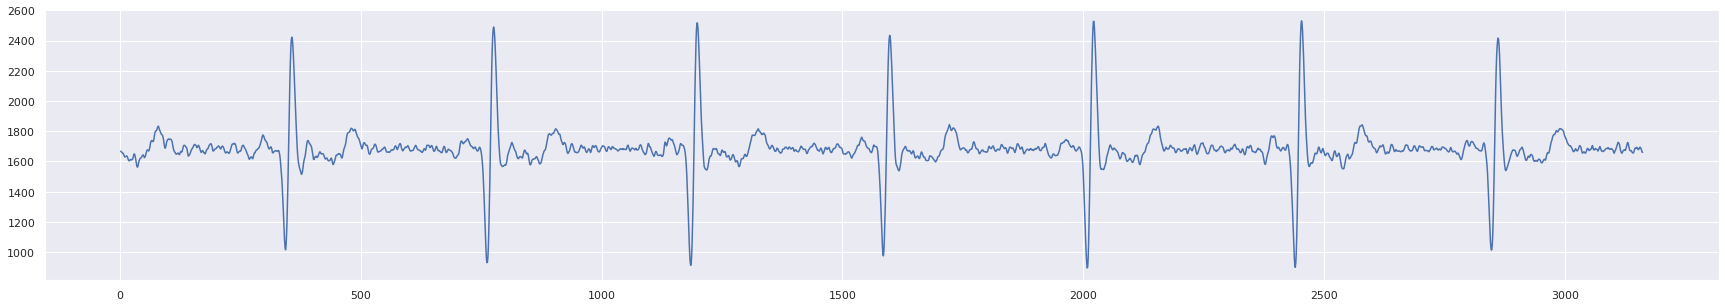

In [83]:
plt.figure(figsize=(30,5))
plt.plot(ECG[2:3162])
plt.show()

In [84]:
PPG = pd.read_csv('ZRZ_PPG.txt',names=['q','G','a','PPG'])
PPG

,q,G,a,PPG
0,1659,1654,1651,0
1,1607,1653,1654,84278
2,1628,1653,1652,149832
3,1646,1654,1654,195578
4,1654,1654,1651,195598
...,...,...,...,...
31615,1673,1653,1652,202904
31616,1667,1653,1652,202929
31617,1633,1654,1652,202963
31618,1590,1652,1652,203017


In [85]:
PPG = PPG['PPG']
PPG =  pd.DataFrame(PPG[5:31620])
PPG

,PPG
5,195628
6,195664
7,195636
8,195653
9,195633
...,...
31615,202904
31616,202929
31617,202963
31618,203017


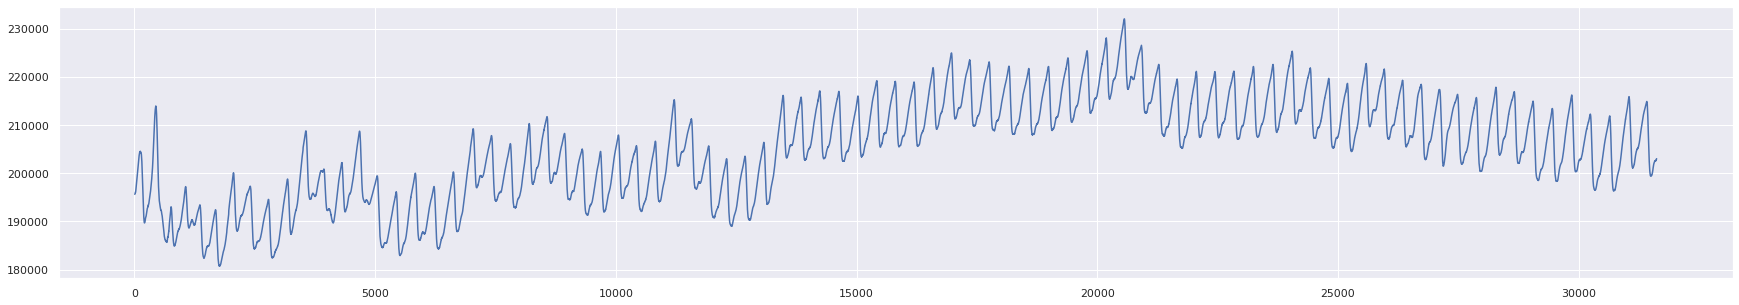

In [86]:
plt.figure(figsize=(30,5))
plt.plot(PPG[2:31620])
plt.show()

In [87]:
from scipy.signal import resample

# Assuming you have PPG and ECG signals as numpy arrays
# Replace these with your actual signals
ppg_signal = PPG.values
ecg_signal = ECG.values

# Define the original and target sampling rates
original_sampling_rate = 300  # Hz
target_sampling_rate = 125  # Hz

# Calculate the resampling factor
resampling_factor = original_sampling_rate / target_sampling_rate

# Calculate the number of samples in the resampled signal
num_samples_resampled = int(len(ppg_signal) / resampling_factor)

# Resample the PPG and ECG signals
resampled_ppg = resample(ppg_signal, num_samples_resampled)
resampled_ecg = resample(ecg_signal, num_samples_resampled)

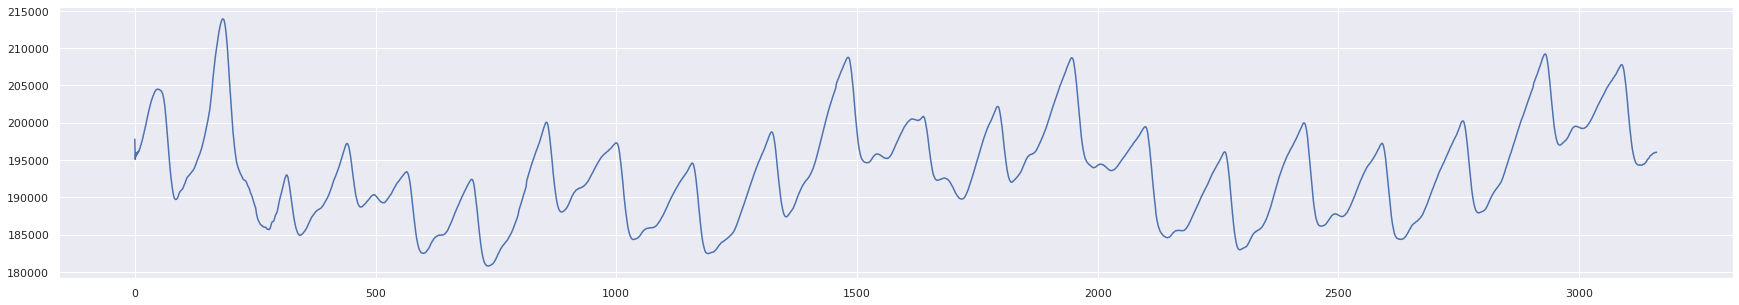

In [88]:
plt.figure(figsize=(30,5))
plt.plot(resampled_ppg[0:3162])
plt.show()

In [89]:
chunk_size = 250

# Calculate the number of chunks
num_chunks = len(resampled_ppg) // chunk_size

# Split the signals into chunks
ppg_chunks = np.split(resampled_ppg[:num_chunks * chunk_size], num_chunks)
ecg_chunks = np.split(resampled_ecg[:num_chunks * chunk_size], num_chunks)


In [90]:
ppg_chunks

[array([[197797.71357332],
        [195089.62214205],
        [195973.94198326],
        [195521.83198328],
        [195956.08870066],
        [195743.69381351],
        [196075.0753513 ],
        [195956.35983422],
        [196232.91289594],
        [196207.63523188],
        [196522.9406576 ],
        [196592.82448269],
        [196918.42483206],
        [197032.96400713],
        [197353.2803402 ],
        [197506.58356281],
        [197825.90861926],
        [198006.59498942],
        [198381.01367362],
        [198583.21358007],
        [198926.84842773],
        [199136.90167572],
        [199471.24989879],
        [199723.36400941],
        [200056.29638386],
        [200336.73483777],
        [200710.69765448],
        [200967.57789868],
        [201290.71044457],
        [201542.73540881],
        [201840.76994778],
        [202061.69013335],
        [202367.10796279],
        [202584.26604894],
        [202862.42482217],
        [203037.52889085],
        [203253.21627714],
 

In [91]:
len(ecg_chunks)

52

In [92]:
ecg_chunks

[array([[1867.95816235],
        [1671.28415219],
        [1655.11890931],
        [1651.81392154],
        [1631.44698599],
        [1632.57316042],
        [1634.77670409],
        [1617.36203004],
        [1603.37946459],
        [1612.29739666],
        [1609.85664996],
        [1617.87083534],
        [1645.30871458],
        [1638.33047521],
        [1592.09088974],
        [1562.38928299],
        [1588.1894906 ],
        [1615.49929005],
        [1622.16681585],
        [1635.01982784],
        [1641.58677838],
        [1626.1805974 ],
        [1640.38560759],
        [1670.95227968],
        [1673.14921278],
        [1673.89406848],
        [1711.94749129],
        [1737.70269047],
        [1731.84836662],
        [1743.44788507],
        [1790.23552257],
        [1802.26748612],
        [1819.53310053],
        [1830.97540371],
        [1807.38520289],
        [1789.18682008],
        [1775.44716925],
        [1758.92289308],
        [1705.90893723],
        [1691.4406175 ],


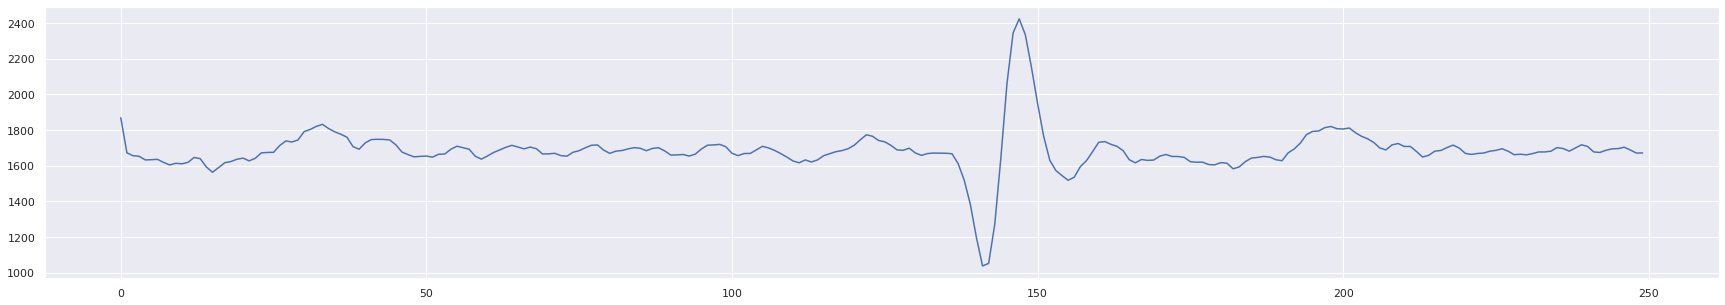

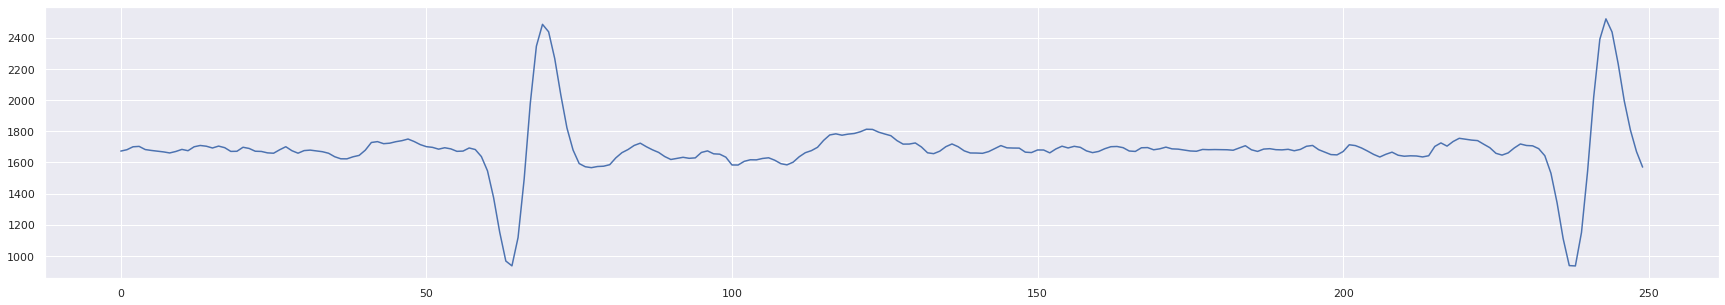

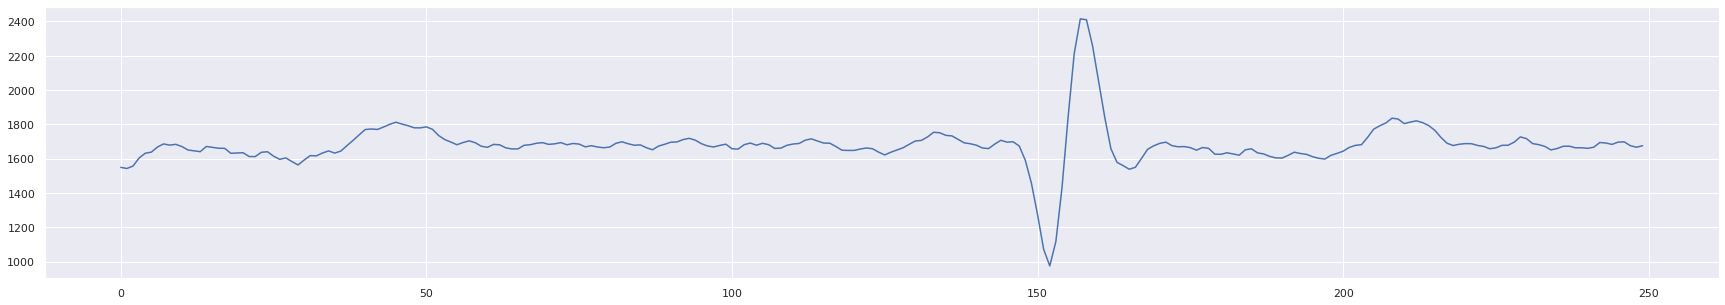

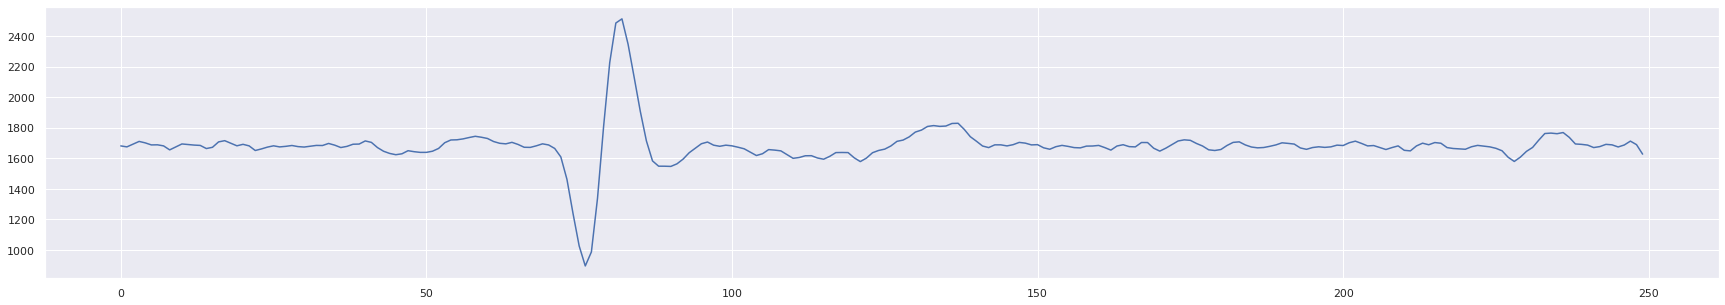

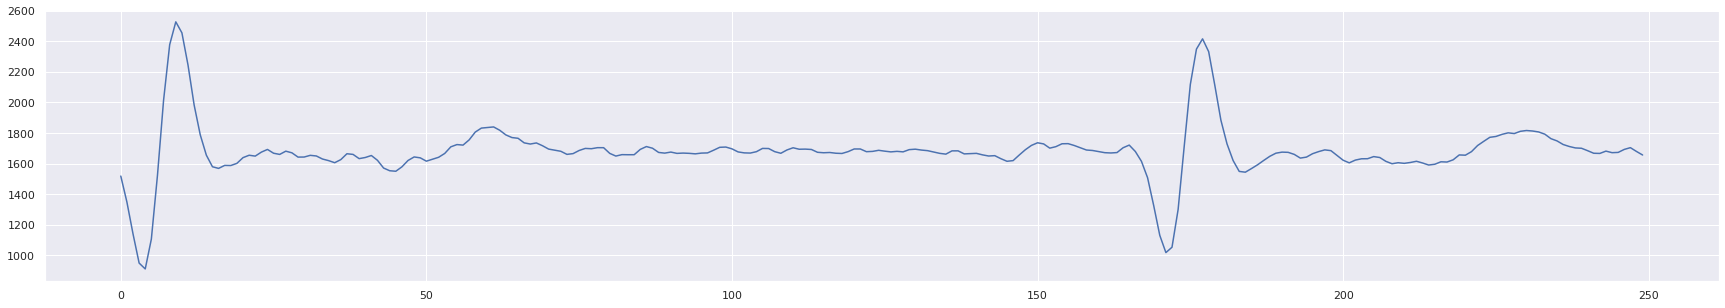

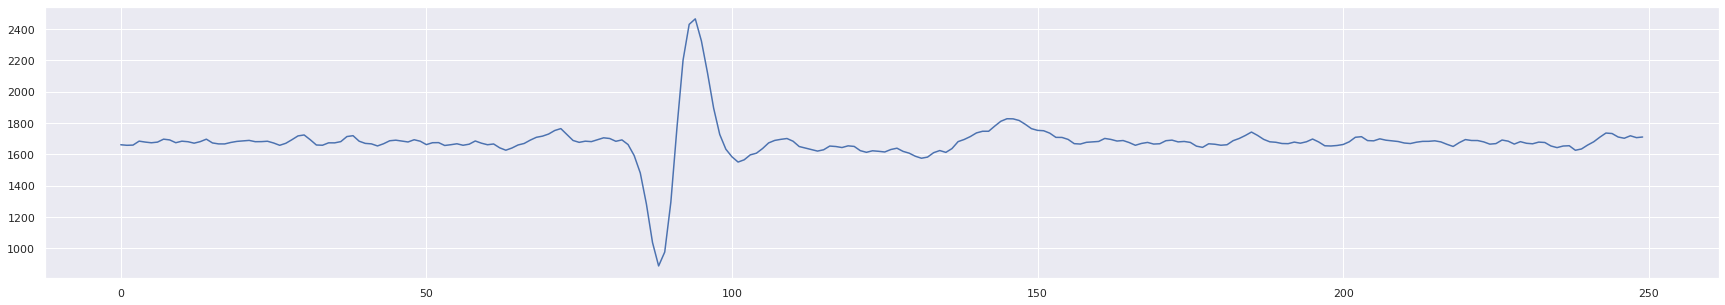

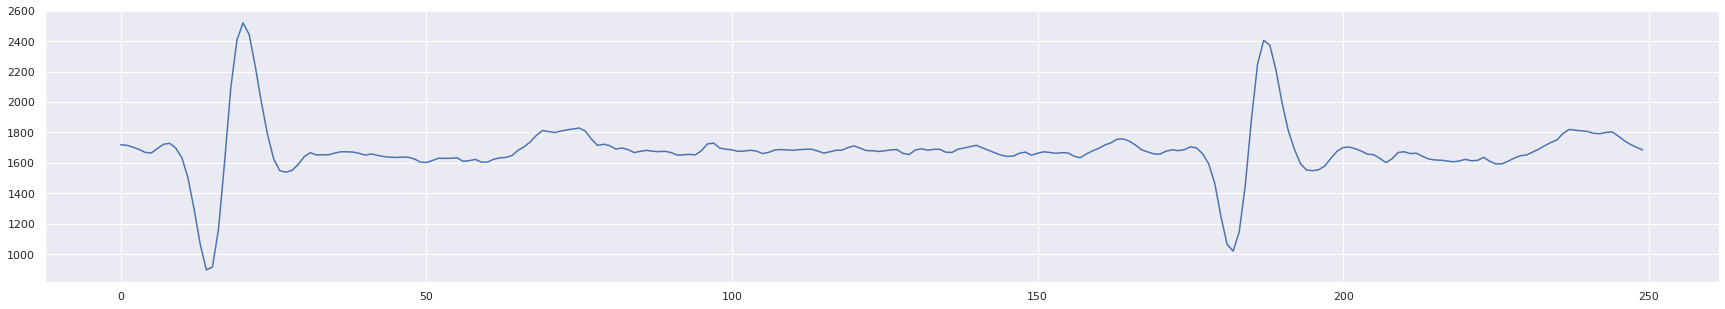

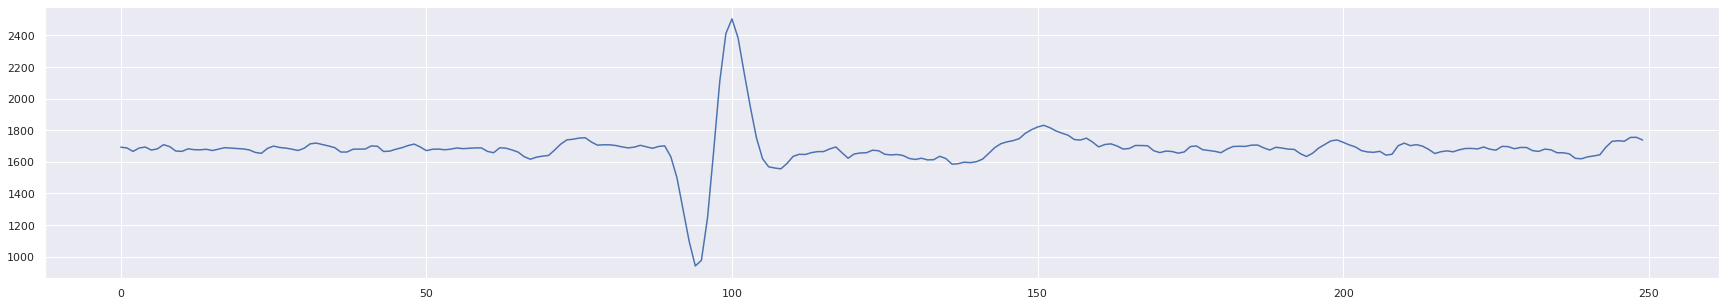

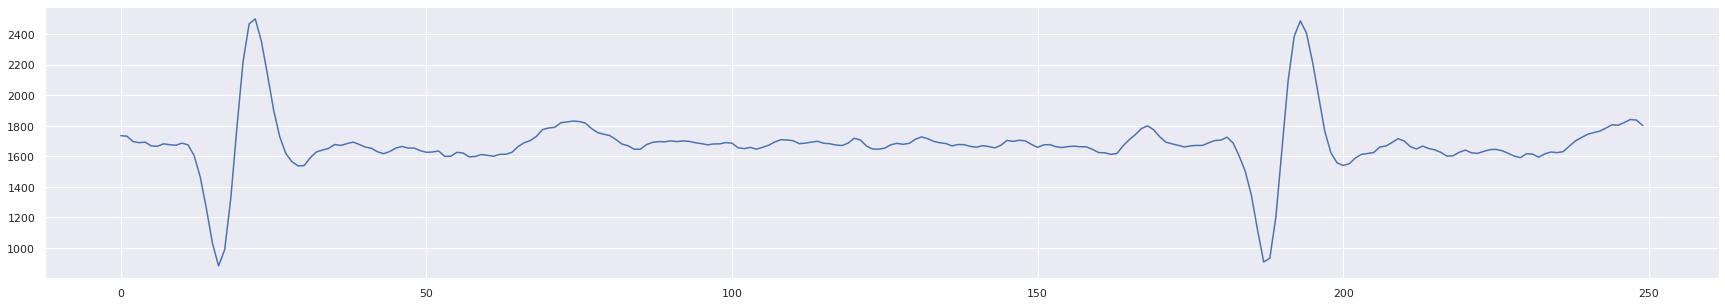

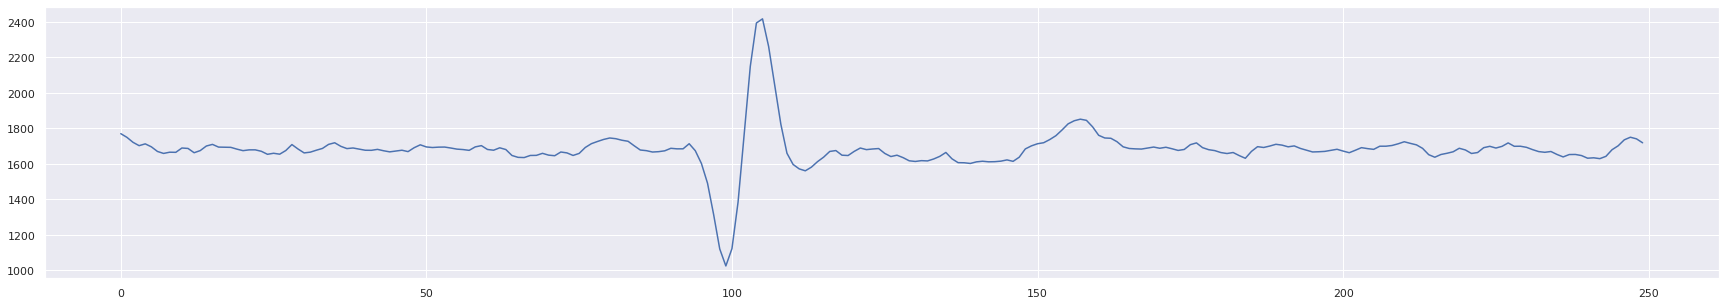

In [93]:
for i in range(0,10):
    plt.figure(figsize=(30,5))
    plt.plot(ecg_chunks[i])
    plt.show()

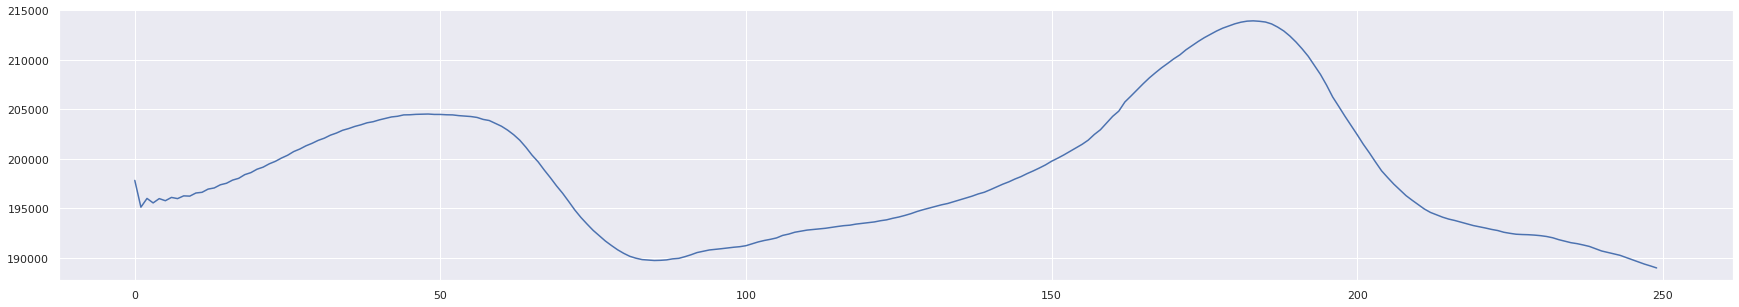

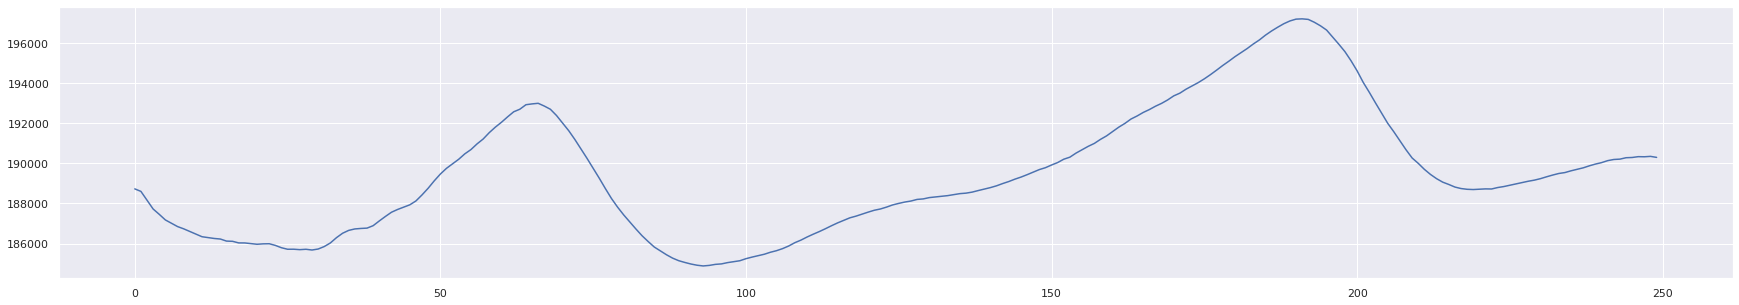

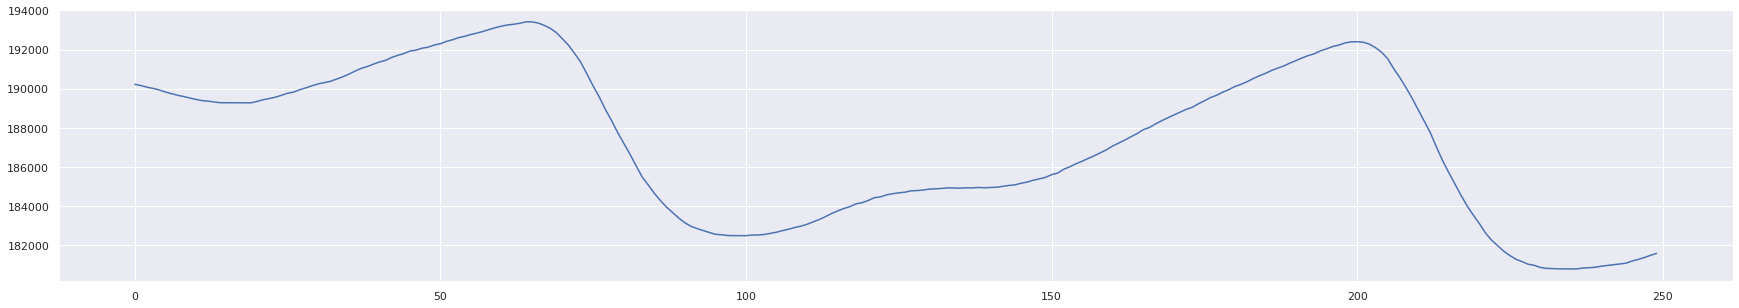

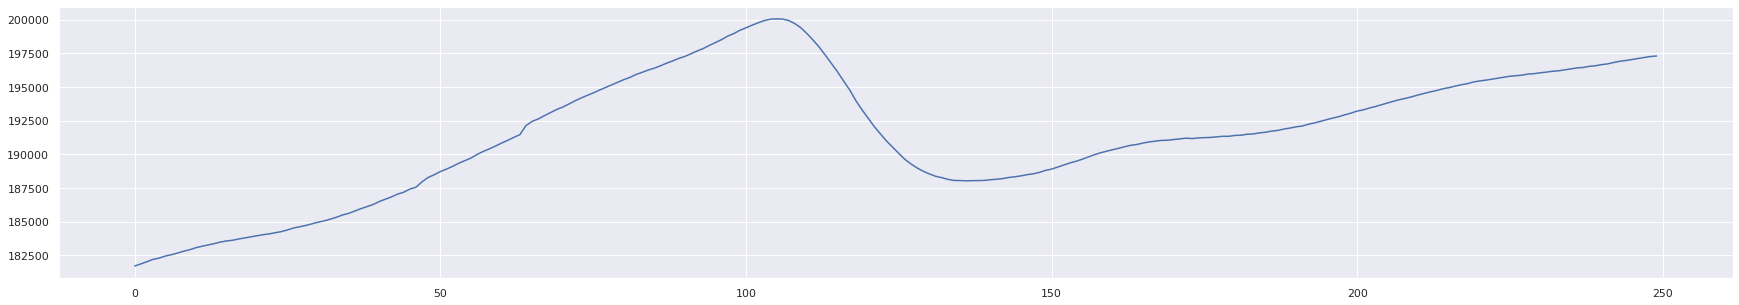

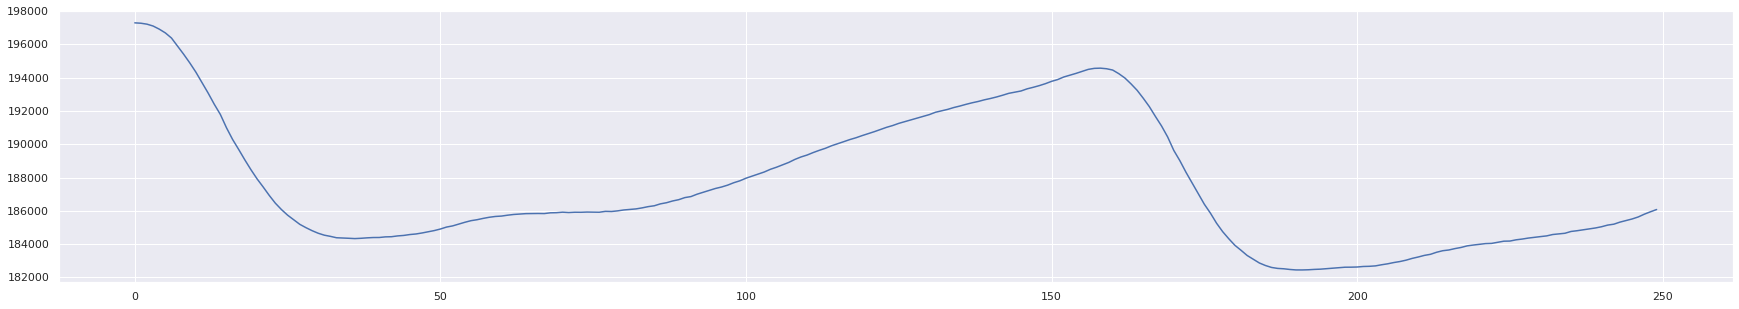

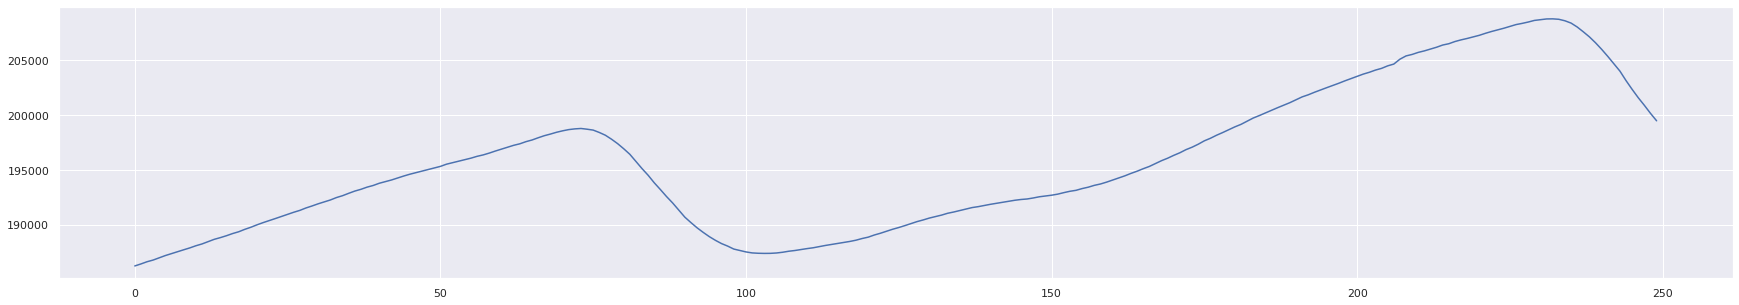

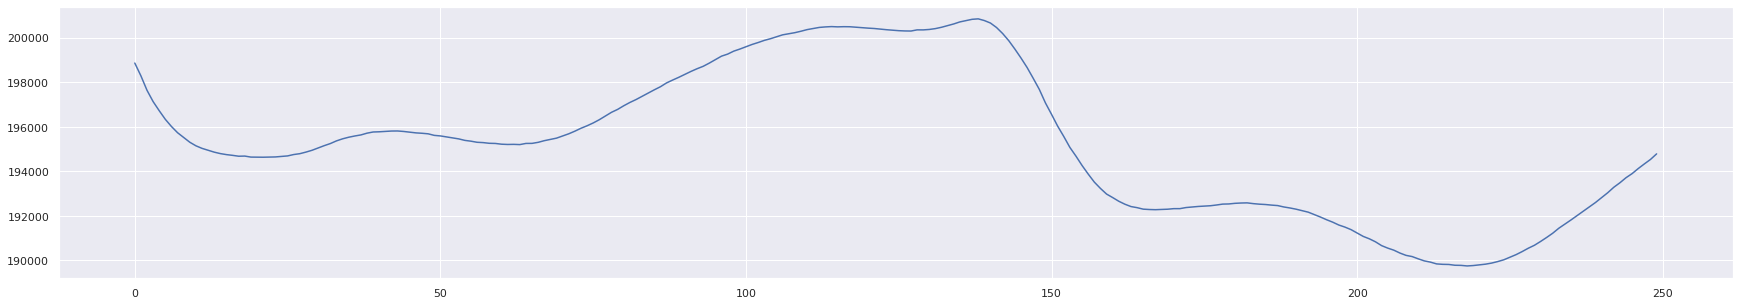

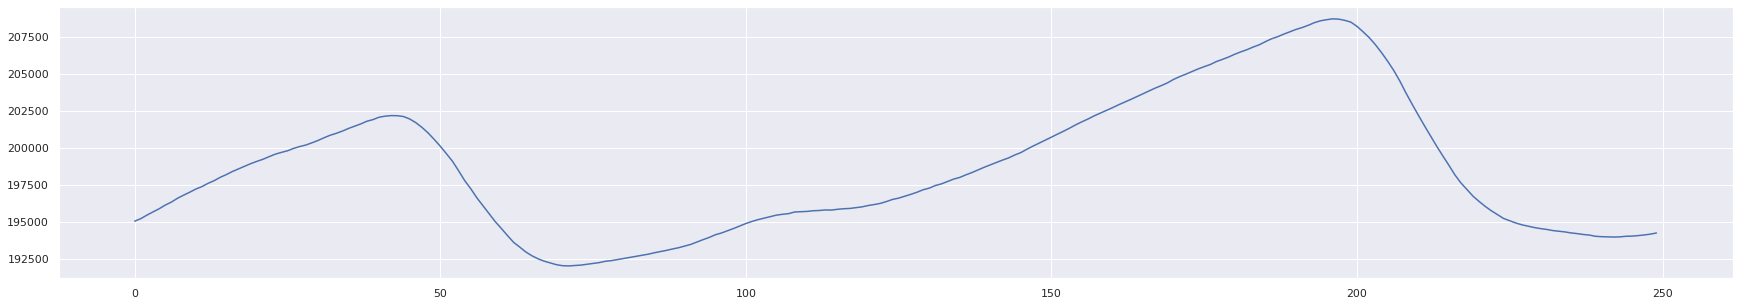

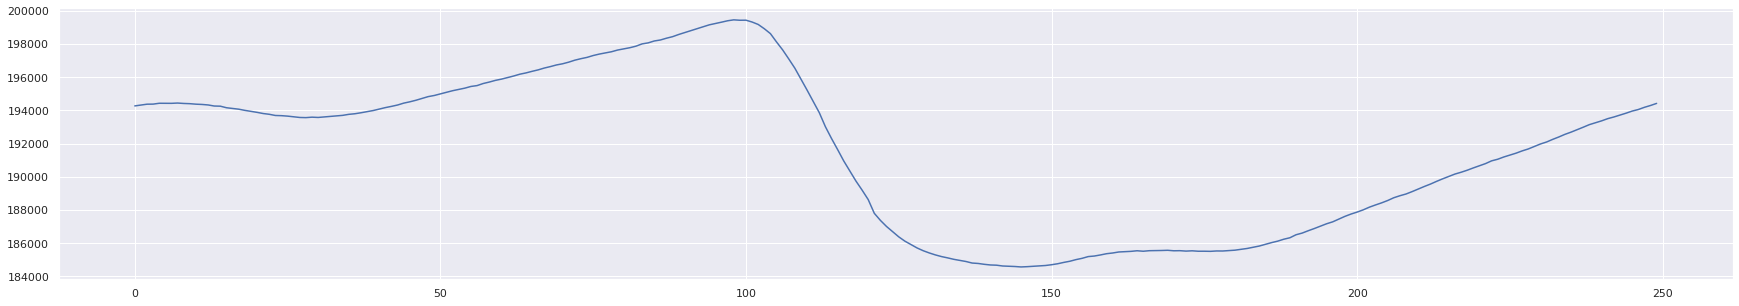

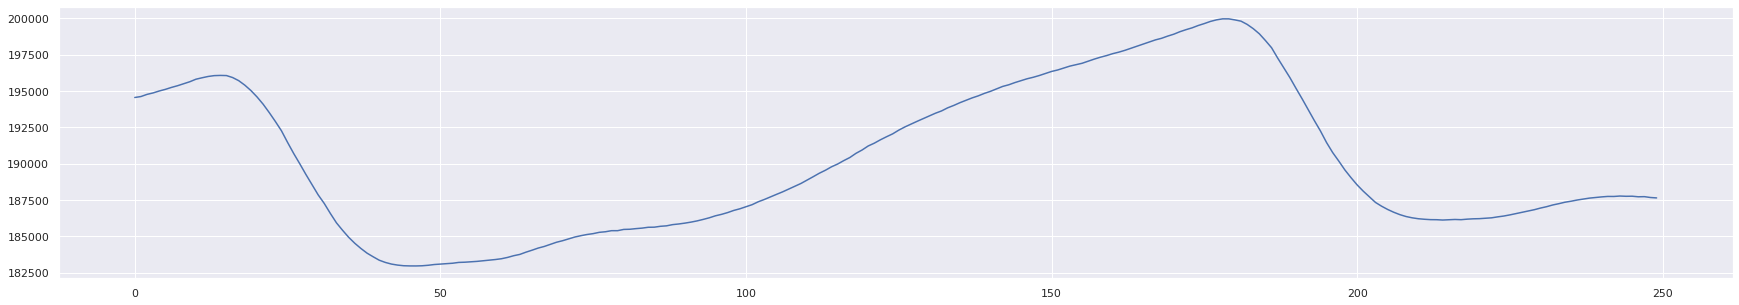

In [94]:
for i in range(0,10):
    plt.figure(figsize=(30,5))
    plt.plot(ppg_chunks[i])
    plt.show()

In [95]:
# ecg_data = np.array(ecg_chunks).reshape(32, 250)


In [96]:
# plt.plot(ecg_data[1])

In [97]:
import numpy as np
from scipy.signal import butter, lfilter

# Define the Butterworth bandpass filter function
def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# Assuming you have PPG and ECG chunks
# Replace these with your actual chunks


# Define filter parameters
lowcut = 0.9  # Lower cutoff frequency in Hz
highcut = 10.0  # Upper cutoff frequency in Hz
fs = 125.0  # Sampling frequency in Hz
order = 2  # Filter order

# Apply the Butterworth bandpass filter to each PPG and ECG chunk
filtered_ppg_chunks = [butter_bandpass_filter(chunk, lowcut, highcut, fs, order) for chunk in ppg_chunks]
filtered_ecg_chunks = [butter_bandpass_filter(chunk, lowcut, highcut, fs, order) for chunk in ecg_chunks]


In [98]:
from sklearn.preprocessing import StandardScaler



# Initialize StandardScaler
scaler_ppg = StandardScaler()
scaler_ecg = StandardScaler()

# Reshape the chunks to 2D arrays (n_samples, n_features)
reshaped_ppg_chunks = np.array([chunk.flatten() for chunk in filtered_ppg_chunks])
reshaped_ecg_chunks = np.array([chunk.flatten() for chunk in filtered_ecg_chunks])

# Fit and transform the PPG data
scaled_ppg_chunks = scaler_ppg.fit_transform(reshaped_ppg_chunks)

# Fit and transform the ECG data
scaled_ecg_chunks = scaler_ecg.fit_transform(reshaped_ecg_chunks)

# Reshape the scaled data back to 3D arrays
scaled_ppg_chunks = [scaled_ppg_chunks[i].reshape(filtered_ppg_chunks[i].shape) for i in range(len(filtered_ppg_chunks))]
scaled_ecg_chunks = [scaled_ecg_chunks[i].reshape(filtered_ecg_chunks[i].shape) for i in range(len(filtered_ecg_chunks))]


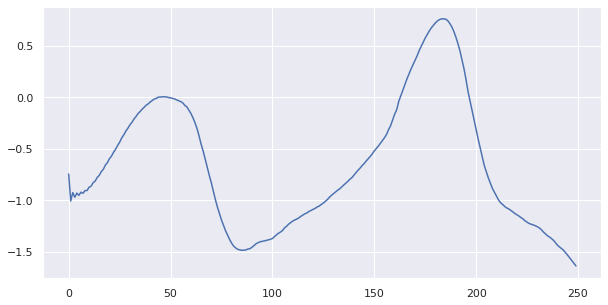

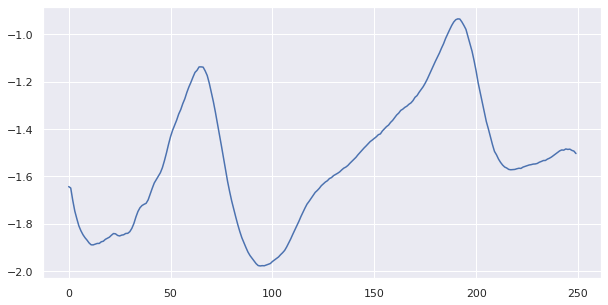

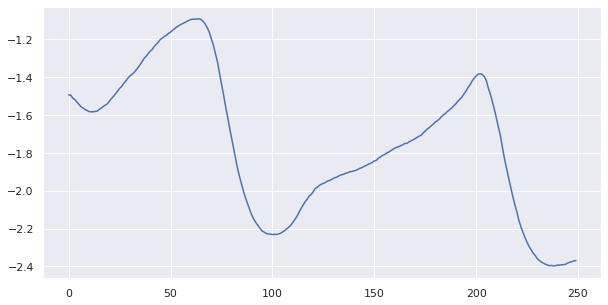

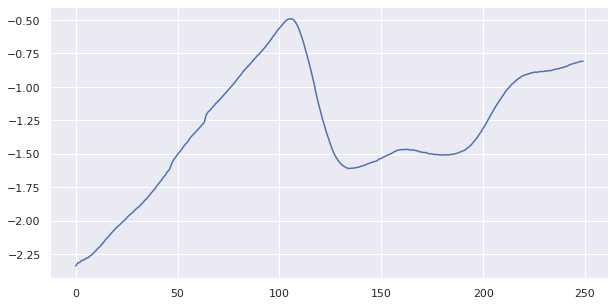

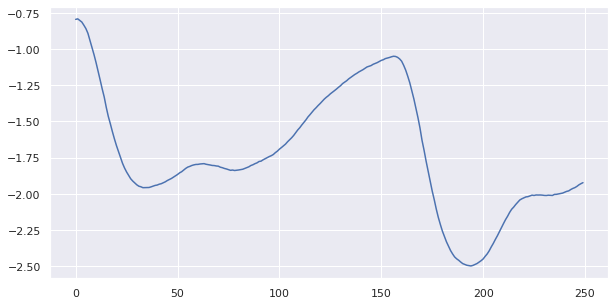

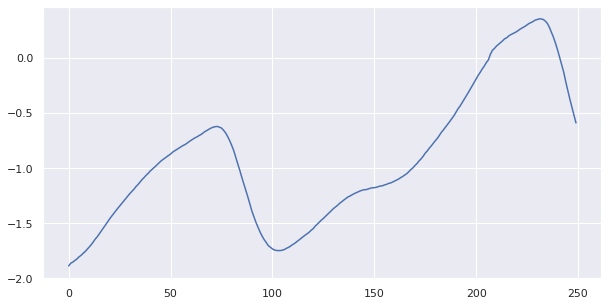

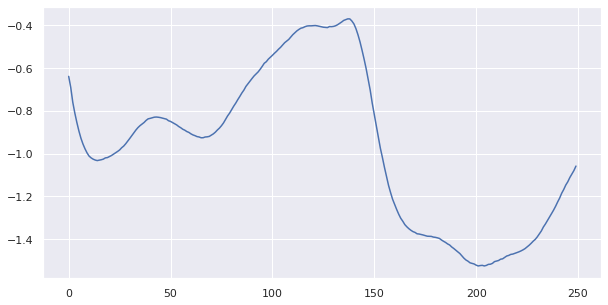

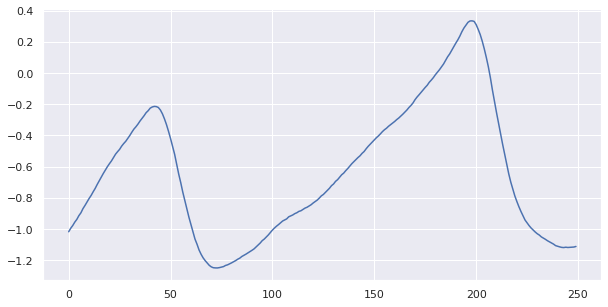

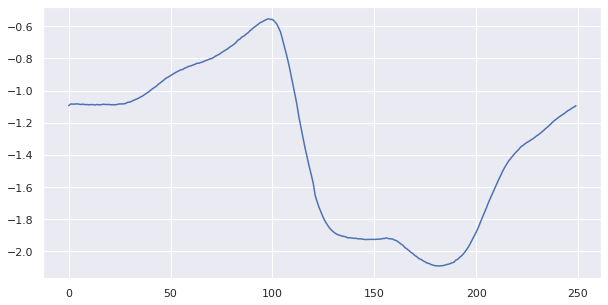

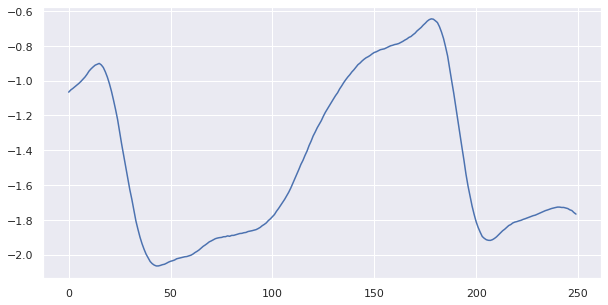

In [99]:
for i in range(0,10):
    plt.figure(figsize=(10,5))
    plt.plot(scaled_ppg_chunks[i])
    plt.show()

In [100]:
data_total = np.concatenate((scaled_ecg_chunks,scaled_ppg_chunks),axis=1)
data_total.shape

(52, 500, 1)

In [101]:
from keras import models    
model = models.load_model('/home/user/Reconstructed ABP waveform/Reviever01_100_20_64.h5')

In [102]:
pre1, yhat1, yhat2  = model.predict(data_total)

2/2 [==============================] - 1s 22ms/step


In [103]:
SBP =[]
DBP = []

for i in range(0,52):

    max_value = max(pre1[i])
    min_value = min(pre1[i])
    
    DBP.append(min_value)
    SBP.append(max_value)

In [104]:
yhat1 = DBP
yhat2 = SBP

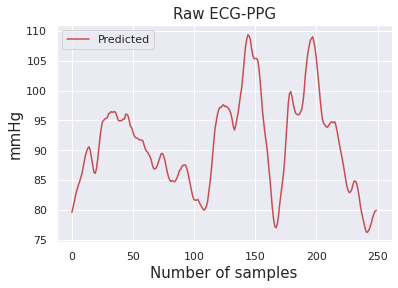

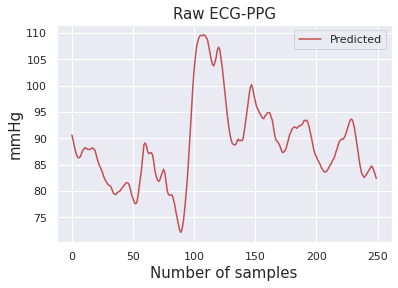

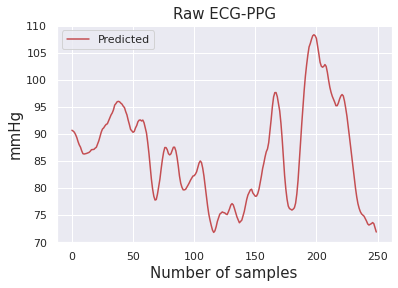

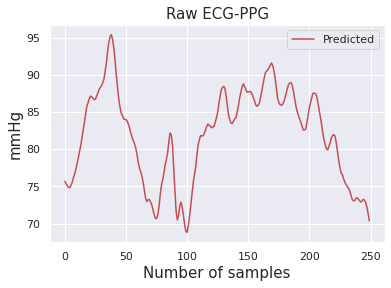

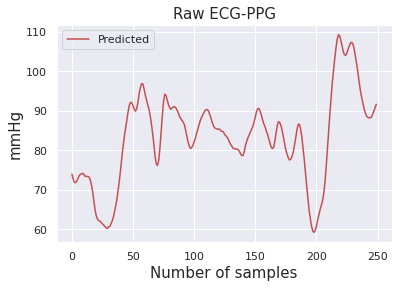

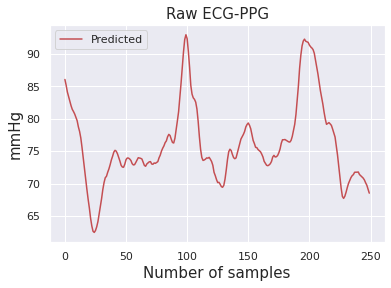

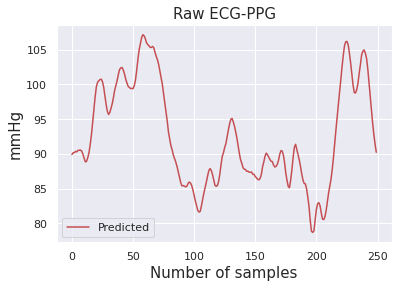

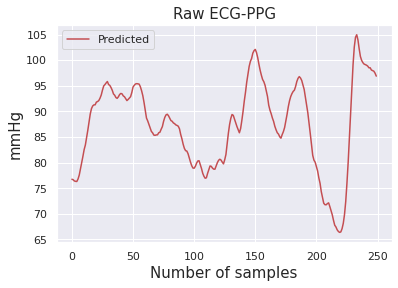

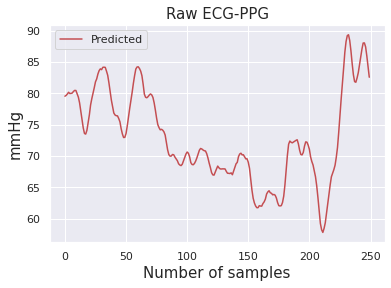

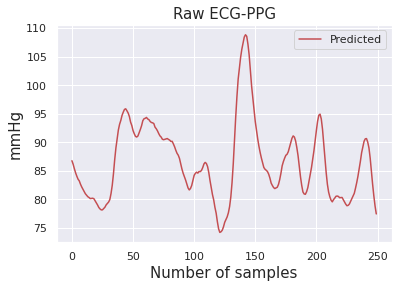

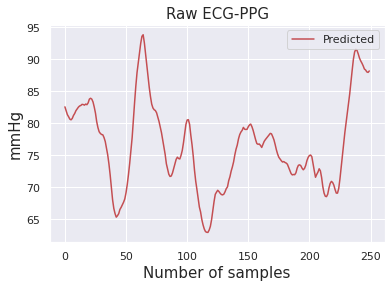

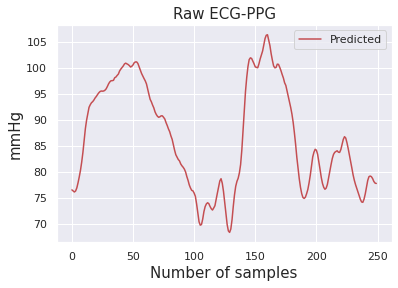

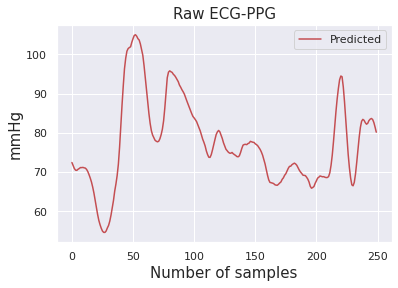

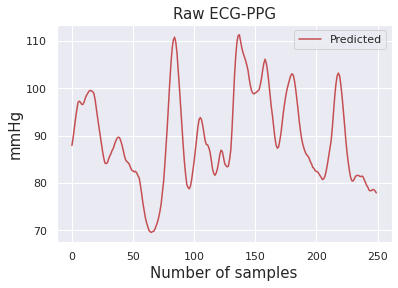

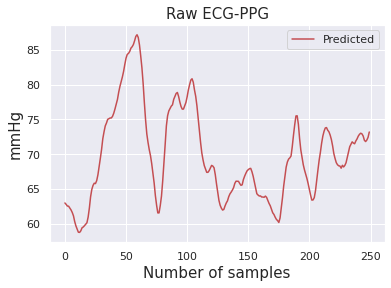

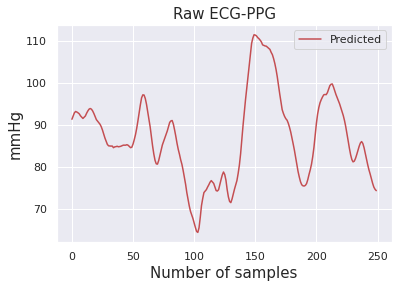

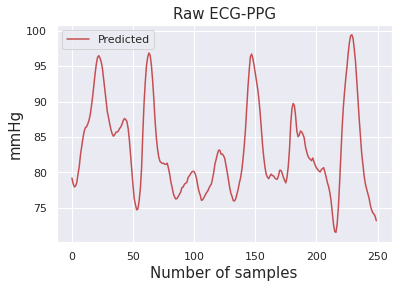

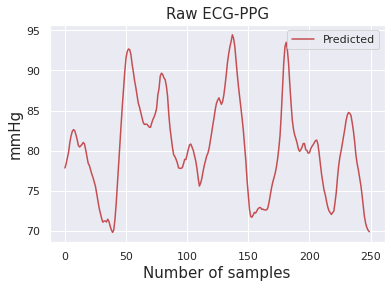

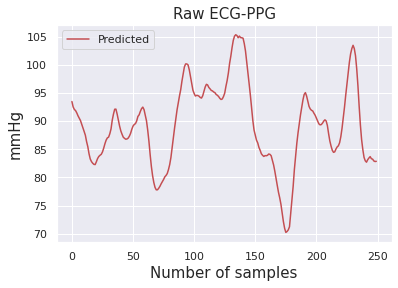

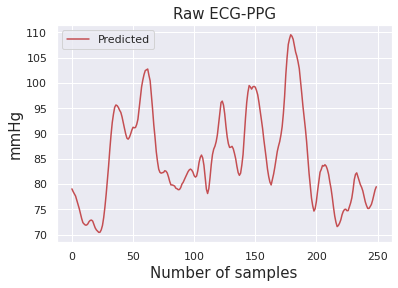

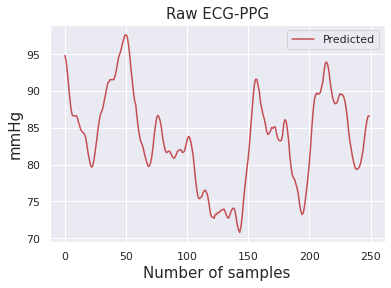

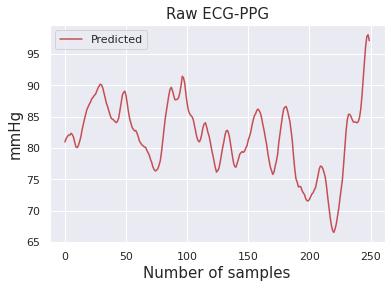

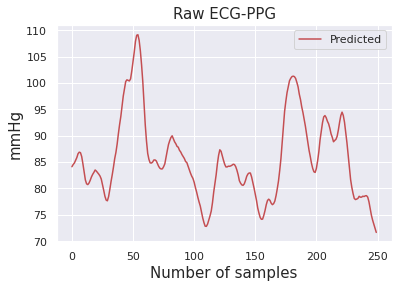

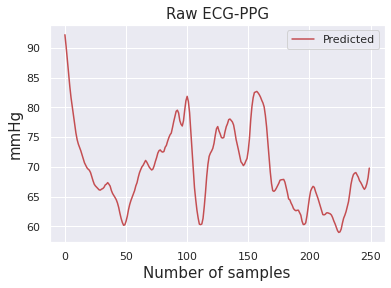

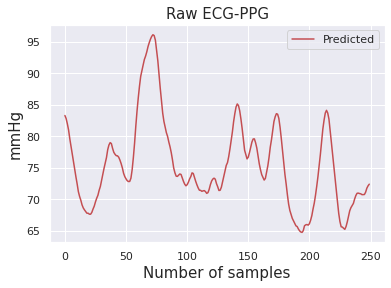

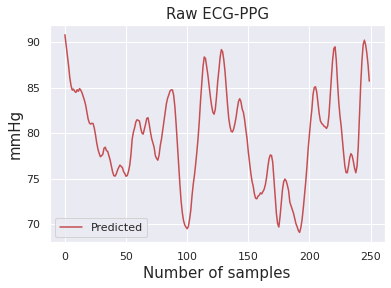

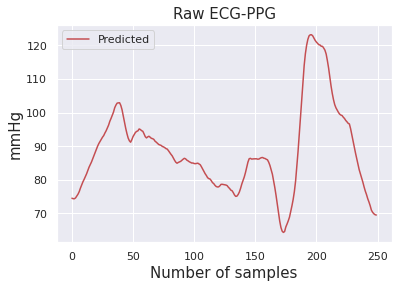

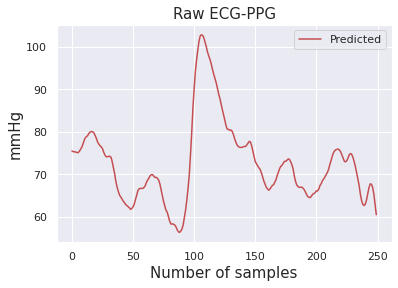

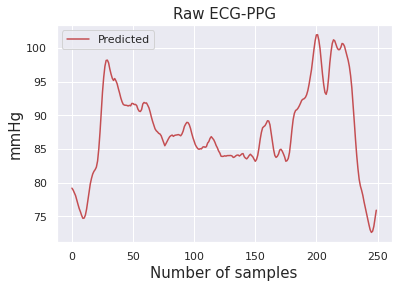

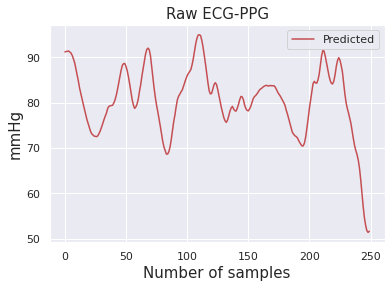

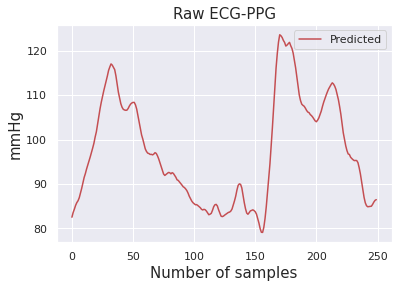

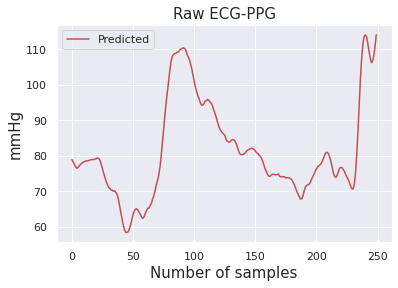

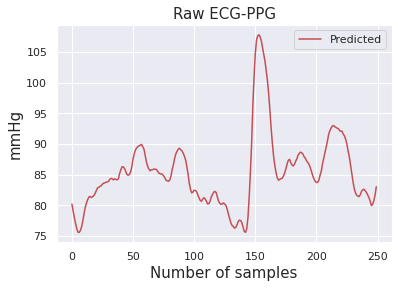

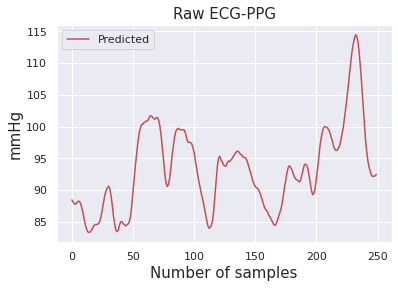

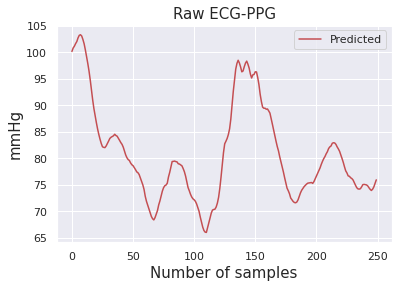

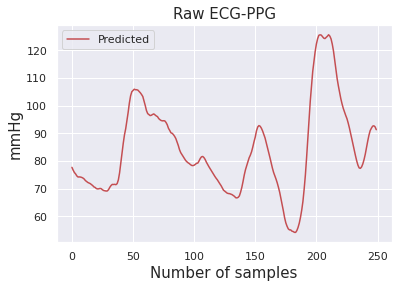

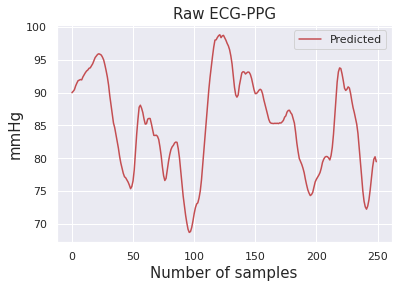

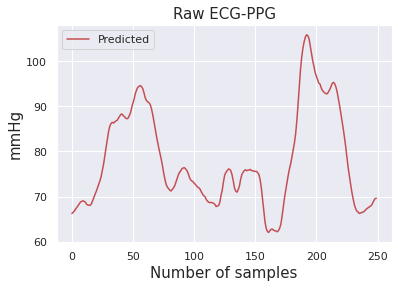

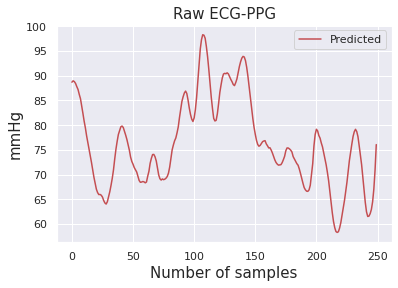

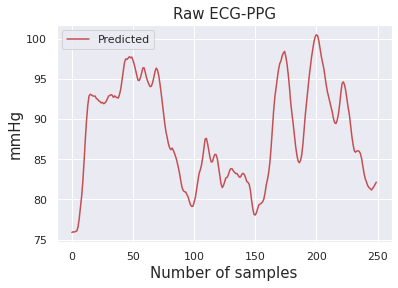

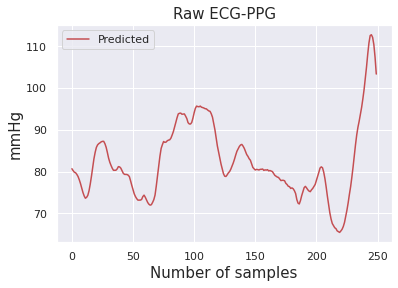

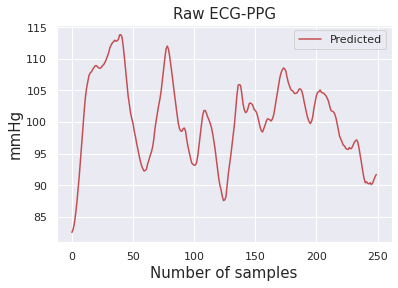

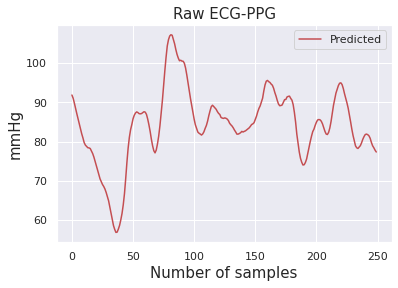

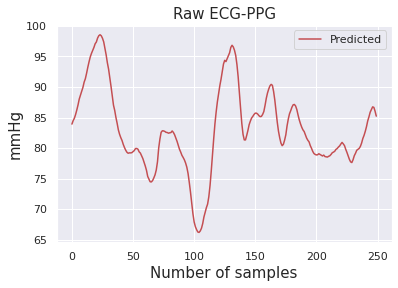

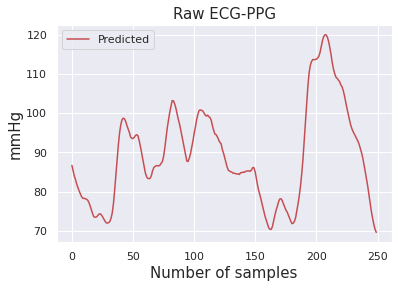

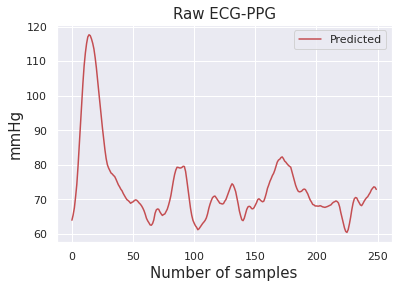

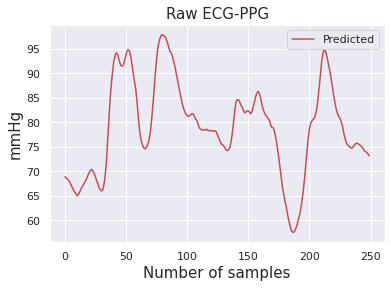

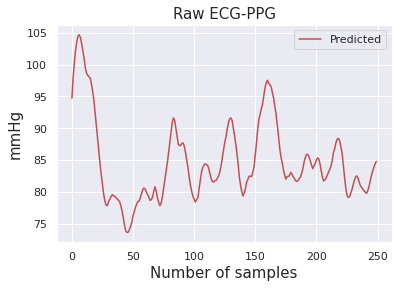

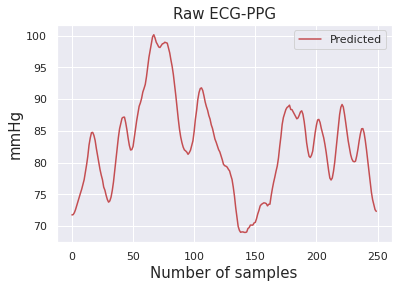

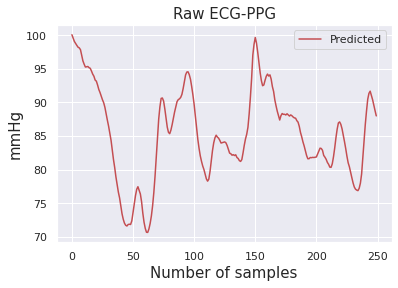

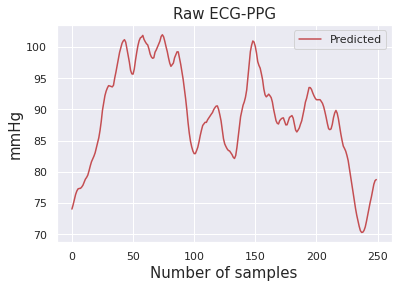

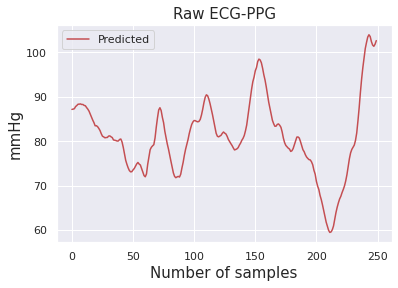

In [105]:
for i in range(0,len(pre1)):
    plt.title('Raw ECG-PPG',fontsize=15)
    # plt.plot(pre1[3],'r',label='True')
    plt.plot(pre1[i],'r', label='Predicted')
    plt.legend()
    plt.xlabel('Number of samples',fontsize=15)
    plt.ylabel('mmHg',fontsize=15)
    plt.show()
    

In [106]:
yhat1

[76.22425,
 72.118805,
 71.8078,
 68.80133,
 59.215458,
 62.457363,
 78.71108,
 66.36312,
 57.816902,
 74.19201,
 62.979397,
 68.356445,
 54.663986,
 69.53371,
 58.75526,
 64.40226,
 71.53282,
 69.77714,
 70.22364,
 70.455025,
 70.79277,
 66.54124,
 71.6674,
 59.006268,
 64.7155,
 69.09101,
 64.354126,
 56.342514,
 72.62781,
 51.368416,
 79.11863,
 58.473618,
 75.590706,
 83.34729,
 65.98325,
 54.217793,
 68.681755,
 62.03414,
 58.32473,
 75.903625,
 65.437035,
 82.524506,
 56.870277,
 66.186554,
 69.62542,
 60.48536,
 57.554794,
 73.59978,
 68.99051,
 70.67475,
 70.28219,
 59.485138]

In [107]:

y_valid = np.random.randint(76,82,(52,1))

z_valid = np.random.randint(105,118,(52,1))

In [108]:
yhat1

[76.22425,
 72.118805,
 71.8078,
 68.80133,
 59.215458,
 62.457363,
 78.71108,
 66.36312,
 57.816902,
 74.19201,
 62.979397,
 68.356445,
 54.663986,
 69.53371,
 58.75526,
 64.40226,
 71.53282,
 69.77714,
 70.22364,
 70.455025,
 70.79277,
 66.54124,
 71.6674,
 59.006268,
 64.7155,
 69.09101,
 64.354126,
 56.342514,
 72.62781,
 51.368416,
 79.11863,
 58.473618,
 75.590706,
 83.34729,
 65.98325,
 54.217793,
 68.681755,
 62.03414,
 58.32473,
 75.903625,
 65.437035,
 82.524506,
 56.870277,
 66.186554,
 69.62542,
 60.48536,
 57.554794,
 73.59978,
 68.99051,
 70.67475,
 70.28219,
 59.485138]

In [110]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

In [111]:
print('R²: ', r2_score(y_valid, yhat1))
print('MAE: ', mean_absolute_error(y_valid, yhat1))
print('RMSE: ', mean_squared_error(y_valid, yhat1, squared=False))


R²:  -58.72008391378814
MAE:  11.541204892672026
RMSE:  13.470604219772062


In [112]:
#DBP
print('R²: ', r2_score(z_valid, yhat2))
print('MAE: ', mean_absolute_error(z_valid, yhat2))
print('RMSE: ', mean_squared_error(z_valid, yhat2, squared=False))


R²:  -9.973737140559727
MAE:  9.56922853910006
RMSE:  11.493070919508408


In [113]:
import seaborn as sns
sns.set()

In [114]:
BPclass = np.zeros(4)
def classify_BP( prediction):

    if (prediction < 5):
        BPclass[0] += 1
    elif (prediction < 10):
        BPclass[1] += 1
    elif (prediction < 15):
        BPclass[2] += 1
    else:
        BPclass[3] += 1

def compute(yTest,yPred):
    # Split dataset into training set and test set in case use the same data for trainning and test
    import math
    Test = []
    Pred = []
    
    band = []
    for i in yTest:
        Test.append(i)
    for i in yPred:
        Pred.append(i)

    # print("list:",Test)
    # print("list:%.2f", Pred)
    erro, std = 0, []
    for i in range(0, yPred.shape[0]):
        # print("yPred: %.3f"%(Pred[i]), "| yTest: %.3f" %(Test[i])," | Erro: %.3f" %(np.abs(Pred[i] - Test[i])))
        # time.sleep(1)
        erro += abs(Pred[i] - Test[i])
        std.append(abs(Pred[i] - Test[i]))
        classify_BP(abs(Pred[i] - Test[i]))
        band.append(Pred[i] - Test[i])
        
        
        
        
        
    fig = plt.figure(figsize=(15, 4), dpi=120)
    ax1 = plt.subplot(1, 3, 1)
#     ax2 = ax1.twinx()
    sns.distplot(band, bins=100, kde=False, rug=False, ax=ax1)
#     sns.distplot(band, bins=100, kde=False, rug=False, ax=ax2)
#     ax2.set_yticklabels(['0 \%', '10 \%', '14.67 \%',
#                      '22.01 \%', '29.35 \%', '36.68 \%', '44.02 \%'])
    ax1.set_xlabel('Error (mmHg)', fontsize=14)
    ax1.set_ylabel('Number of Samples', fontsize=14)
#     ax2.set_ylabel('Percentage of Samples', fontsize=14)
    plt.title('Error in DBP Prediction', fontsize=18)
    plt.xlim(xmax=30.0, xmin=-30.0)
    #plt.xticks(np.arange(0, 60+1, 5))
    plt.tight_layout()


    print("Number of test: %d" % (sum(BPclass)))
    print("Mean Error: %.3f" % (erro / yPred.shape[0]))
    print("Standar Deviation NP: %.3f" % (np.std(std)))
    print("Classe 5mmHg: %d " % (BPclass[0]), "-> %.2f" % (BPclass[0] / (sum(BPclass)) * 100), "%")
    print("Classe 10mmHg: %d " % (BPclass[1]), "-> %.2f" % (BPclass[1] / (sum(BPclass)) * 100), "%",
          " %.2f" % ((BPclass[0] + BPclass[1]) / (sum(BPclass)) * 100), "%")
    print("Classe 15mmHg: %d " % (BPclass[2]), "-> %.2f" % (BPclass[2] / (sum(BPclass)) * 100), "%",
          " %.2f" % ((BPclass[0] + BPclass[1] + BPclass[2]) / (sum(BPclass)) * 100), "%")
    print("Classe >15mmHg: %d " % (BPclass[3]), "-> %.2f" % (BPclass[3] / (sum(BPclass)) * 100), "%")
    # print(" ------- END OF ANALYSIS ------")


In [115]:
def compute1(yTest,yPred):
    # Split dataset into training set and test set in case use the same data for trainning and test
    import math
    Test = []
    Pred = []
    
    band = []
    for i in yTest:
        Test.append(i)
    for i in yPred:
        Pred.append(i)

    # print("list:",Test)
    # print("list:%.2f", Pred)
    erro, std = 0, []
    for i in range(0, yPred.shape[0]):
        # print("yPred: %.3f"%(Pred[i]), "| yTest: %.3f" %(Test[i])," | Erro: %.3f" %(np.abs(Pred[i] - Test[i])))
        # time.sleep(1)
        erro += abs(Pred[i] - Test[i])
        std.append(abs(Pred[i] - Test[i]))
        classify_BP(abs(Pred[i] - Test[i]))
        band.append(Pred[i] - Test[i])
        
        
        
        
        
    fig = plt.figure(figsize=(15, 4), dpi=120)
    ax1 = plt.subplot(1, 3, 1)
#     ax2 = ax1.twinx()
    sns.distplot(band, bins=100, kde=False, rug=False, ax=ax1)
#     sns.distplot(band, bins=100, kde=False, rug=False, ax=ax2)
#     ax2.set_yticklabels(['0 \%', '10 \%', '14.67 \%',
#                      '22.01 \%', '29.35 \%', '36.68 \%', '44.02 \%'])
    ax1.set_xlabel('Error (mmHg)', fontsize=14)
    ax1.set_ylabel('Number of Samples', fontsize=14)
#     ax2.set_ylabel('Percentage of Samples', fontsize=14)
    plt.title('Error in DBP Prediction', fontsize=18)
    plt.xlim(xmax=30.0, xmin=-30.0)
    #plt.xticks(np.arange(0, 60+1, 5))
    plt.tight_layout()


    print("Number of test: %d" % (sum(BPclass)))
    print("Mean Error: %.3f" % (erro / yPred.shape[0]))
    print("Standar Deviation NP: %.3f" % (np.std(std)))
    print("Classe 5mmHg: %d " % (BPclass[0]), "-> %.2f" % (BPclass[0] / (sum(BPclass)) * 100), "%")
    print("Classe 10mmHg: %d " % (BPclass[1]), "-> %.2f" % (BPclass[1] / (sum(BPclass)) * 100), "%",
          " %.2f" % ((BPclass[0] + BPclass[1]) / (sum(BPclass)) * 100), "%")
    print("Classe 15mmHg: %d " % (BPclass[2]), "-> %.2f" % (BPclass[2] / (sum(BPclass)) * 100), "%",
          " %.2f" % ((BPclass[0] + BPclass[1] + BPclass[2]) / (sum(BPclass)) * 100), "%")
    print("Classe >15mmHg: %d " % (BPclass[3]), "-> %.2f" % (BPclass[3] / (sum(BPclass)) * 100), "%")
    # print(" ------- END OF ANALYSIS ------")


/home/user/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/tmp/ipykernel_53344/2706596311.py:57: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Mean Error: %.3f" % (erro / yPred.shape[0]))


Number of test: 52
Mean Error: 9.569
Standar Deviation NP: 6.366
Classe 5mmHg: 15  -> 28.85 %
Classe 10mmHg: 15  -> 28.85 %  57.69 %
Classe 15mmHg: 11  -> 21.15 %  78.85 %
Classe >15mmHg: 11  -> 21.15 %


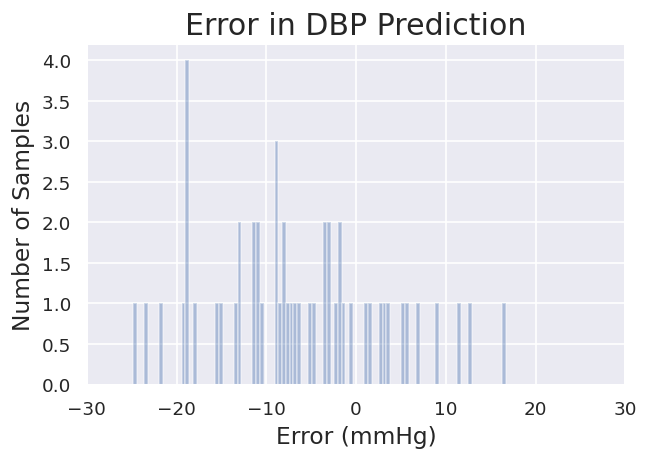

In [118]:
compute(z_valid, np.array(yhat2))

Number of test: 104
Mean Error: 11.541
Standar Deviation NP: 6.947
Classe 5mmHg: 24  -> 23.08 %
Classe 10mmHg: 31  -> 29.81 %  52.88 %
Classe 15mmHg: 23  -> 22.12 %  75.00 %
Classe >15mmHg: 26  -> 25.00 %


/tmp/ipykernel_53344/3475154761.py:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Mean Error: %.3f" % (erro / yPred.shape[0]))


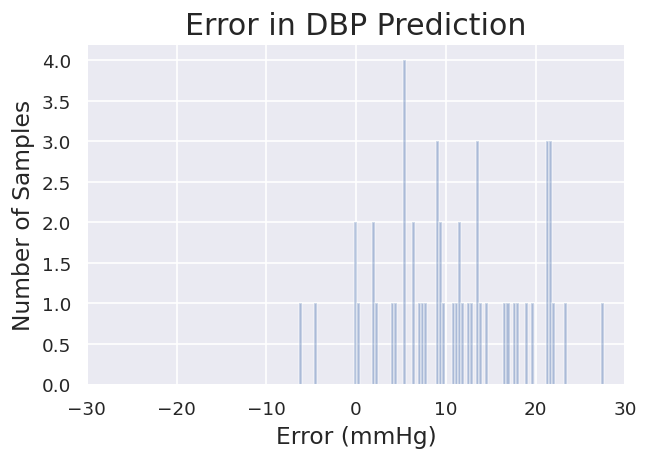

In [119]:
 compute1(yhat1, np.array(y_valid))

In [120]:
y_valid  = pd.DataFrame(y_valid)
z_valid  = pd.DataFrame(z_valid)

In [143]:
Ypred1 = yhat1

Ytrue = z_valid
Ypred = yhat2

Ytrue1 = y_valid.values


In [144]:
from plot import evaluate_BP_Classification
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable

# evaluate_BP_Classification(z_valid, yhat2, yhat1, y_valid)

In [145]:
Ypred1 = yhat1

Ypred1

[76.22425,
 72.118805,
 71.8078,
 68.80133,
 59.215458,
 62.457363,
 78.71108,
 66.36312,
 57.816902,
 74.19201,
 62.979397,
 68.356445,
 54.663986,
 69.53371,
 58.75526,
 64.40226,
 71.53282,
 69.77714,
 70.22364,
 70.455025,
 70.79277,
 66.54124,
 71.6674,
 59.006268,
 64.7155,
 69.09101,
 64.354126,
 56.342514,
 72.62781,
 51.368416,
 79.11863,
 58.473618,
 75.590706,
 83.34729,
 65.98325,
 54.217793,
 68.681755,
 62.03414,
 58.32473,
 75.903625,
 65.437035,
 82.524506,
 56.870277,
 66.186554,
 69.62542,
 60.48536,
 57.554794,
 73.59978,
 68.99051,
 70.67475,
 70.28219,
 59.485138]

DBPS Classification Accuracy
                  precision    recall  f1-score   support

    Hypertension    1.00000   0.96154   0.98039        52
Pre-hypertension    0.00000   0.00000   0.00000         0

        accuracy                        0.96154        52
       macro avg    0.50000   0.48077   0.49020        52
    weighted avg    1.00000   0.96154   0.98039        52

SBPS Classification Accuracy
              precision    recall  f1-score   support

Normotension    1.00000   1.00000   1.00000        52

    accuracy                        1.00000        52
   macro avg    1.00000   1.00000   1.00000        52
weighted avg    1.00000   1.00000   1.00000        52



/home/user/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/tmp/ipykernel_53344/2943862425.py:47: RuntimeWarning: invali

ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of ticklabels (3).

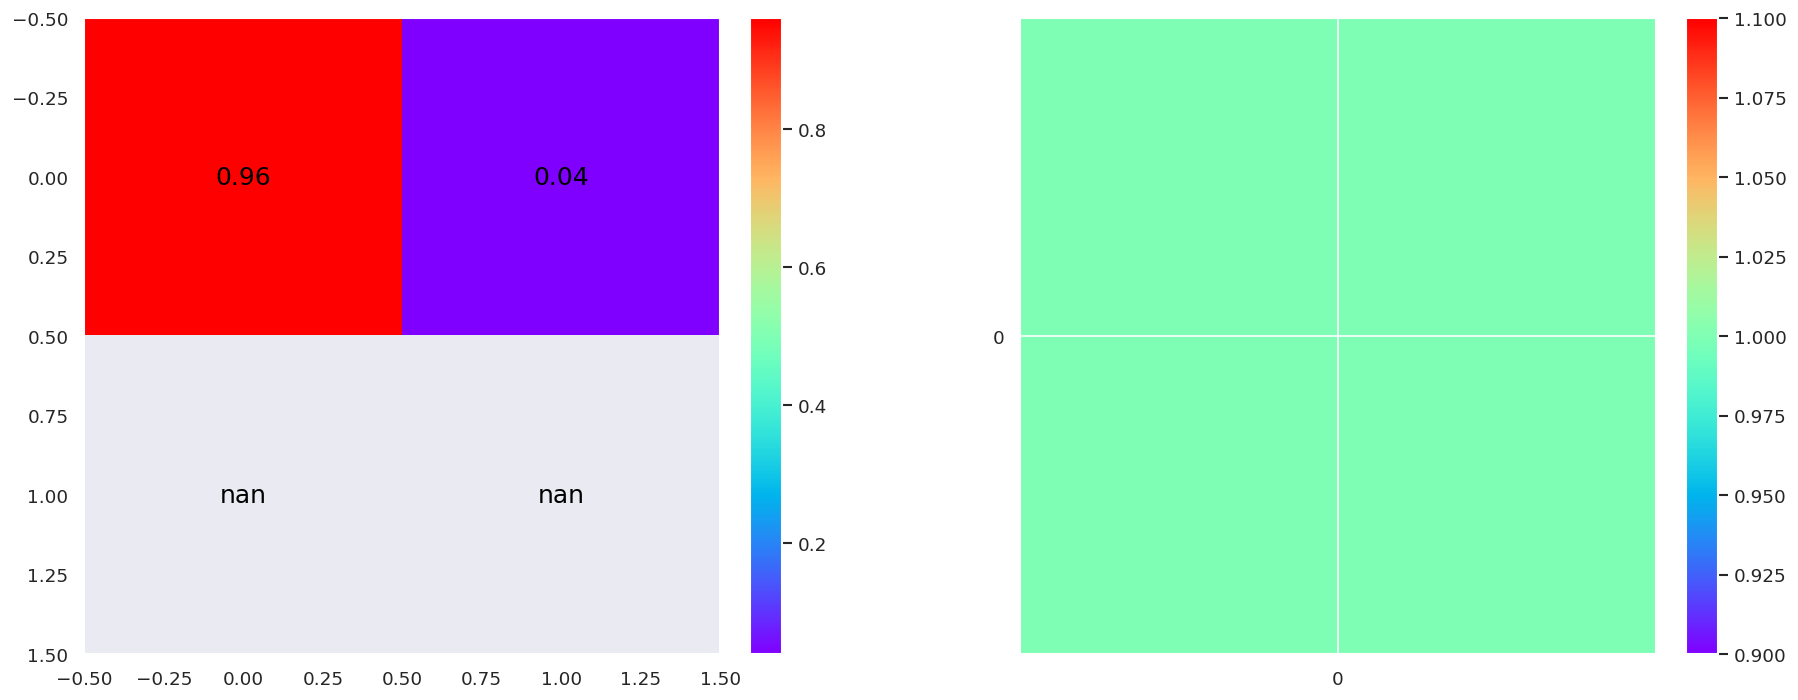

In [146]:
Ypred1 = yhat1

Ytrue = z_valid.values
Ypred = yhat2# loading prediction
#     Ytrue1 = y_valid.values
#     Ytrue1 = y_valid.values
#     Ypred1 = yhat1
Ytrue1 = y_valid.values

### DBPS ####

cls_gt = []
cls_pred = []

for i in (range(len(Ytrue))):
    dbp_gt = Ytrue[i].ravel()
    dbp_pred = Ypred[i].ravel()

    # 		dbp_gt = max_abp*min(y_t)+min_abp
    # 		dbp_pred = max_abp*min(y_p)+min_abp

    if (dbp_gt <= 80):
        cls_gt.append('Normotension')
    elif ((dbp_gt > 80) and (dbp_gt <= 90)).all():
        cls_gt.append('Pre-hypertension')
    elif (dbp_gt > 90).all():
        cls_gt.append('Hypertension')
    else:
        print('bump')  # this will never happen, check for error

    if (dbp_pred <= 80):
        cls_pred.append('Normotension')
    elif ((dbp_pred > 80) and (dbp_pred <= 90)):
        cls_pred.append('Pre-hypertension')
    elif (dbp_pred > 90):
        cls_pred.append('Hypertension')
    else:
        print('bump')  # this will never happen, check for error

print('DBPS Classification Accuracy')
print(classification_report(cls_gt, cls_pred, digits=5))
# print('-'*25)
# print(accuracy_score(cls_gt,cls_pred))

cm = confusion_matrix(cls_gt, cls_pred)
classes = ['Hypertension', 'Normotension', 'Prehypertension']
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig = plt.figure(figsize=(16, 6), dpi=120)
ax = plt.subplot(1, 2, 1)
im = ax.imshow(cm, interpolation='nearest', cmap="rainbow")  # draw confusion matrix

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.25)

ax.figure.colorbar(im, cax=cax)
# ax.set(xticks=np.arange(cm.shape[1]),
#        yticks=np.arange(cm.shape[0]),
#        xticklabels=classes, yticklabels=classes)

# ax.set_title('Blood Pressure Classification Accuracy Using DBP', fontsize=18)
# ax.set_ylabel('True label', fontsize=16)
# ax.set_xlabel('Predicted label', fontsize=16)

# plt.setp(ax.get_xticklabels(), rotation=45, fontsize=15, ha="right",
#          rotation_mode="anchor")

# plt.setp(ax.get_yticklabels(), fontsize=15)

fmt = '.2f'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center", fontsize=15,
                color="b" if cm[i, j] > thresh else "black")

ax.grid(False)

fig.tight_layout()
2023-12-04 09:54:48.624263: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8401
2023-12-04 09:54:51.528253: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f6b54731680 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-04 09:54:51.528325: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA TITAN RTX, Compute Capability 7.5
### SBPS ####

cls_gt = []
cls_pred = []

for i in (range(len(Ytrue))):
    sbp_gt = Ytrue1[i].ravel()
    sbp_pred = Ypred1[i].ravel()

    if (sbp_gt <= 120):
        cls_gt.append('Normotension')
    elif ((sbp_gt > 120) and (sbp_gt <= 140)):
        cls_gt.append('Prehypertension')
    elif (sbp_gt > 140):
        cls_gt.append('Hypertension')
    else:
        print('bump')  # this will never happen, check for error

    if (sbp_pred <= 120):
        cls_pred.append('Normotension')
    elif ((sbp_pred > 120) and (sbp_pred <= 140)):
        cls_pred.append('Prehypertension')
    elif (sbp_pred > 140):
        cls_pred.append('Hypertension')
    else:
        print('bump')  # this will never happen, check for error

print('SBPS Classification Accuracy')
print(classification_report(cls_gt, cls_pred, digits=5))
# print('-'*25)
# print(accuracy_score(cls_gt,cls_pred))

cm = confusion_matrix(cls_gt, cls_pred)
classes = ['Hypertension', 'Normotension', 'Prehypertension']
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax = plt.subplot(1, 2, 2)
im = ax.imshow(cm, interpolation='nearest', cmap="rainbow")  # draw confusion matrix

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.25)

ax.figure.colorbar(im, cax=cax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes)

ax.set_title('Blood Pressure Classification Accuracy Using SBP', fontsize=18)
ax.set_ylabel('True label', fontsize=16)
ax.set_xlabel('Predicted label', fontsize=16)

plt.setp(ax.get_xticklabels(), rotation=45, fontsize=15, ha="right",
         rotation_mode="anchor")

plt.setp(ax.get_yticklabels(), fontsize=15)

fmt = '.2f'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center", fontsize=15,
                color="b" if cm[i, j] > thresh else "black")

ax.grid(False)

fig.tight_layout()

plt.show()
